In [1]:
import pandas as pd
import numpy as np
from scipy.stats import fisher_exact, chisquare
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')
# sharper plots
%config InlineBackend.figure_format = 'retina'

import plotly.express as px
import os, re

In [31]:
avocado_full = pd.read_csv("E:\\.ML\\[Анатолий Карпов] [Stepic] Data Analytic Часть 1\\6\\Задания\\avocado_full.csv", index_col=0, parse_dates=['Date'])
avocado_mean = pd.read_csv("E:\\.ML\\[Анатолий Карпов] [Stepic] Data Analytic Часть 1\\6\\Задания\\avocado_mean.csv", parse_dates=['Date'])
delays = pd.read_csv("E:\\.ML\\[Анатолий Карпов] [Stepic] Data Analytic Часть 1\\6\\Задания\\delays.csv")

In [3]:
round(avocado_mean.rolling(3).mean().dropna().max(), 2)

AveragePrice    1.85
dtype: float64

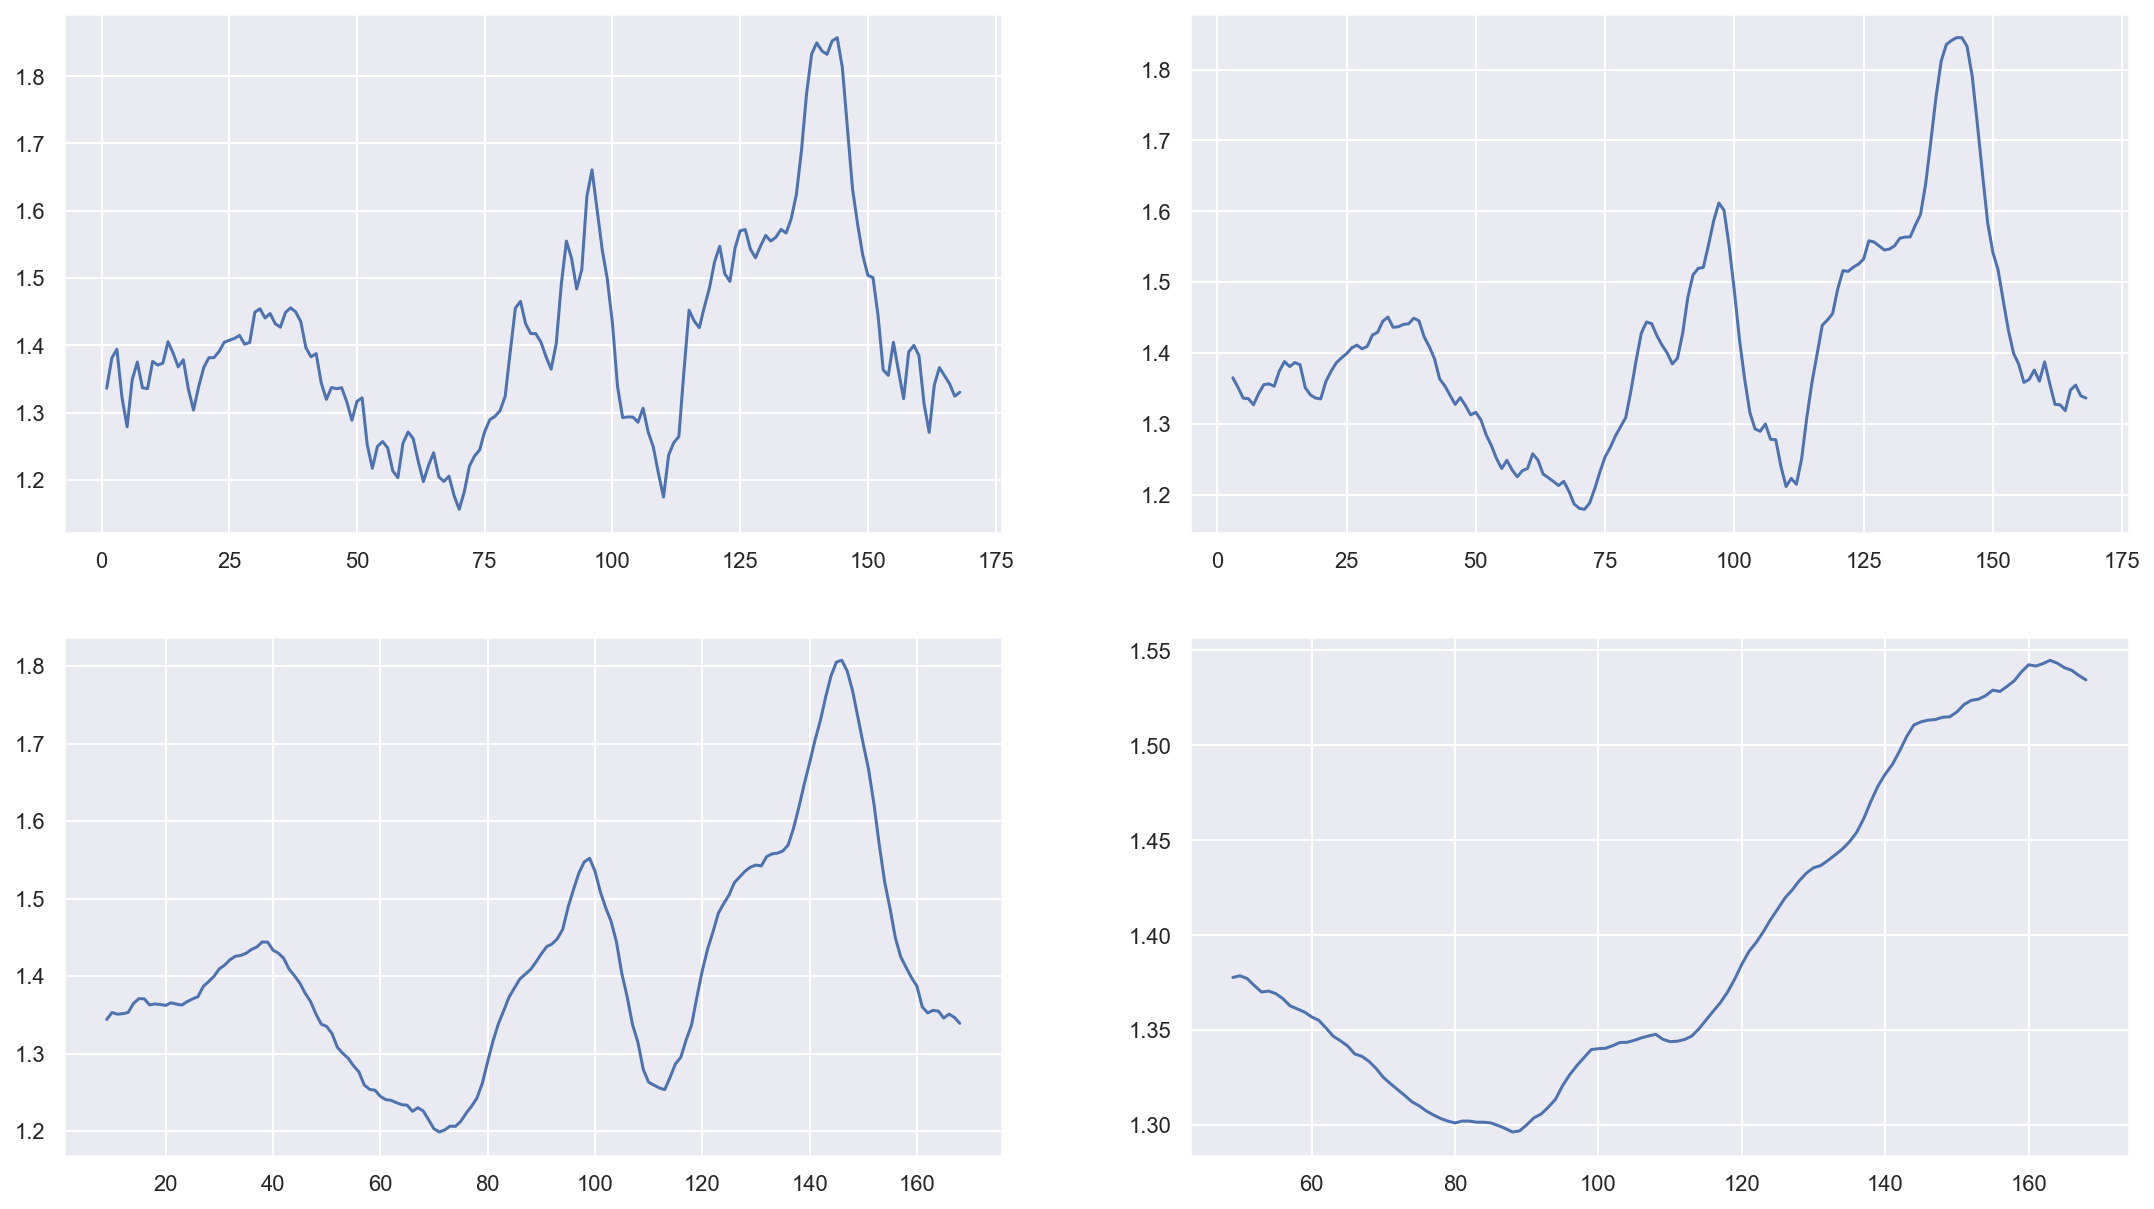

In [26]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(18.5, 10.5)
ax[0, 0].plot(avocado_mean.rolling(2, center=True).mean())
ax[0, 1].plot(avocado_mean.rolling(4).mean())
ax[1, 0].plot(avocado_mean.rolling(10).mean())
ax[1, 1].plot(avocado_mean.rolling(50).mean());

<AxesSubplot:>

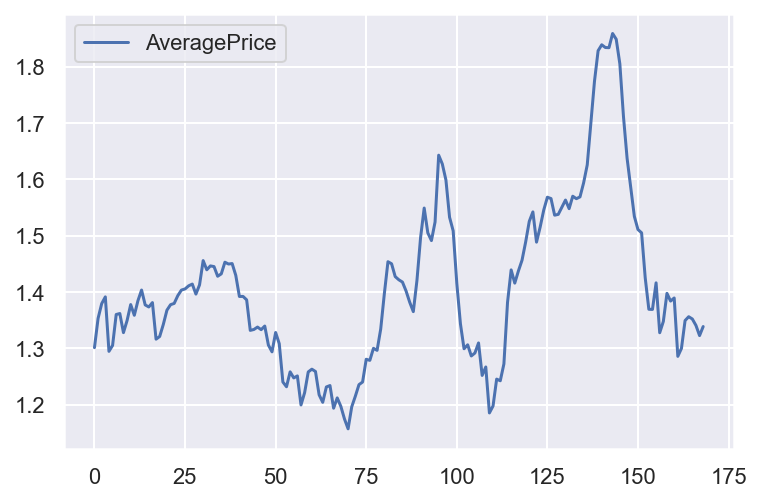

In [30]:
avocado_ewm = avocado_mean.ewm(span=2).mean()
avocado_ewm.plot()

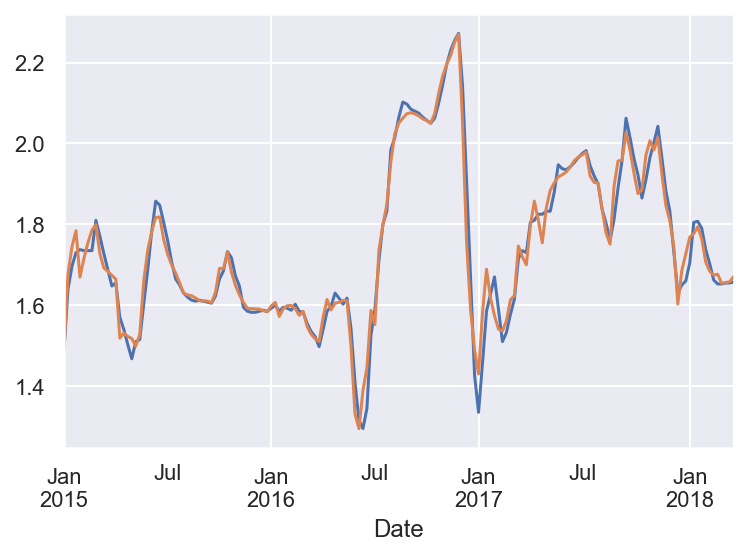

In [37]:
avo_chicago_organic_rolling = avocado_full.query('region == "Chicago" & type == "organic"').AveragePrice.rolling(4, min_periods=1).mean()
avo_chicago_organic_rolling_ewm = avocado_full.query('region == "Chicago" & type == "organic"').AveragePrice.ewm(span=4).mean()
avo_chicago_organic_rolling.plot();
avo_chicago_organic_rolling_ewm.plot();

In [47]:
delays['delay'] = pd.to_timedelta(delays.delay.str.replace('-',''))

In [46]:
delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   client_id   264 non-null    int64          
 1   company_id  264 non-null    int64          
 2   delay       264 non-null    timedelta64[ns]
 3   revenue     264 non-null    int64          
dtypes: int64(3), timedelta64[ns](1)
memory usage: 8.4 KB


### Разбивка времени на промежутки

In [64]:
bins = [pd.to_timedelta('0d'), pd.to_timedelta('1d'), pd.to_timedelta('2d'), pd.to_timedelta('3d'), pd.to_timedelta('5d')]
delays['labeled_time'] = pd.cut(delays.delay, bins=bins, labels=['under 1 day', '1-2 days', '2-3 days', 'over 3 days'])

In [70]:
delays.head()

,client_id,company_id,delay,revenue,labeled_time
0,2389,4240,1 days 14:57:48,705436,1-2 days
1,7614,9544,4 days 02:14:23,859266,over 3 days
2,2052,2427,0 days 06:08:57,812416,under 1 day
3,9635,8054,0 days 23:40:19,162312,under 1 day
4,8154,5503,1 days 13:21:53,658844,1-2 days


### Распределение категорий задержек

In [74]:
delays_cats = delays.labeled_time.value_counts()
fig = px.bar(delays_cats, x=delays_cats.index, y=delays_cats.values, labels=dict(x="Delay", y="Amount"))
fig.show()